## Importing the Libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Data preparation (importing, preprocessing and transforming the data from Toronto's open data portal)

In [2]:
# Importing the latitude and longitude data from TOP (Toronto open portal)
Latlong = pd.read_csv("https://ckan0.cf.opendata.inter.prod-toronto.ca/datastore/dump/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15")
Latlong.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,5881,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4359..."
1,5882,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4109..."
2,5883,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3911..."
3,5884,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{""type"": ""Polygon"", ""coordinates"": [[[-79.5052..."
4,5885,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4396..."


In [3]:
Latlong.columns.values

array(['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID',
       'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME', 'AREA_DESC', 'X',
       'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID', 'Shape__Area',
       'Shape__Length', 'geometry'], dtype=object)

In [4]:
Latlong.drop(['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_LONG_CODE', 'AREA_DESC', 'X',
       'Y', 'OBJECTID', 'Shape__Area',
       'Shape__Length', 'geometry' ], axis=1, inplace=True)

In [5]:
Latlong.rename(columns= {'AREA_SHORT_CODE': 'Neighbourhood Id', 'AREA_NAME':'Neighbourhood'}, inplace=True)
Latlong.columns

Index(['Neighbourhood Id', 'Neighbourhood', 'LONGITUDE', 'LATITUDE'], dtype='object')

In [6]:
Latlong

,Neighbourhood Id,Neighbourhood,LONGITUDE,LATITUDE
0,94,Wychwood (94),-79.425515,43.676919
1,100,Yonge-Eglinton (100),-79.403590,43.704689
2,97,Yonge-St.Clair (97),-79.397871,43.687859
3,27,York University Heights (27),-79.488883,43.765736
4,31,Yorkdale-Glen Park (31),-79.457108,43.714672
5,114,Lambton Baby Point (114),-79.496045,43.657420
6,38,Lansing-Westgate (38),-79.424748,43.754271
7,105,Lawrence Park North (105),-79.403978,43.730060
8,103,Lawrence Park South (103),-79.406039,43.717212
9,56,Leaside-Bennington (56),-79.366072,43.703797


##### The latitude and longuitude data will be used for Toronto's map (using folium) 

In [7]:
import numpy as np
from geopy.geocoders import Nominatim 

In [8]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [9]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(Latlong['LATITUDE'], Latlong['LONGITUDE'], Latlong['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [10]:
# Importing the economical data form TOP (Toronto open portal)
Economics = pd.read_excel("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/6a62d263-632e-489b-bd3d-2adc5056beca/resource/78cf2678-8cd9-442b-a8e7-ed9ae6e82e01/download/wellbeing-toronto-economics.xlsx", "RawData-Ref Period 2011", skiprows=1)
Economics.head()

,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,414216,1311,1276
3,Rexdale-Kipling,4,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,5,67,60,692,233832,903,1683


In [11]:
Economics.columns.values

array(['Neighbourhood', 'Neighbourhood Id', 'Businesses',
       'Child Care Spaces', 'Debt Risk Score', 'Home Prices',
       'Local Employment', 'Social Assistance Recipients'], dtype=object)

In [12]:
# As social assistance receipients are irrelevant to our analysis, this column will be dorpped

Economics_new=Economics.drop (columns=['Social Assistance Recipients', 'Neighbourhood Id'])
Economics_new.head()

,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment
0,West Humber-Clairville,2463,195,719,317508,58271
1,Mount Olive-Silverstone-Jamestown,271,60,687,251119,3244
2,Thistletown-Beaumond Heights,217,25,718,414216,1311
3,Rexdale-Kipling,144,75,721,392271,1178
4,Elms-Old Rexdale,67,60,692,233832,903


In [13]:
# Importing the data related to neighborhoods` profiles
Profiles= pd.read_excel("C:/Users/deca/Desktop/Toronto data/profiles-2016.xlsx", skiprows=1)
Profiles.head() 

,Neighbourhood,Neighbourhood Id,Average household size,Couples with children,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data)
0,Agincourt North,129,3.16,4250,427037,1720
1,Agincourt South-Malvern West,128,2.88,3180,278390,2250
2,Alderwood,20,2.60,1645,168602,950
3,Annex,95,1.80,1975,792507,9870
4,Banbury-Don Mills,42,2.23,3335,493486,4735


In [14]:
# merging both tables in order to finaly have one table includion all the data needed for segmentation
df_merge=pd.merge(Economics_new, Profiles, on='Neighbourhood', how='inner')
df_merge.reset_index
df_merge.head()

,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Neighbourhood Id,Average household size,Couples with children,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data)
0,West Humber-Clairville,2463,195,719,317508,58271,1,3.20,4490,426156,3275
1,Mount Olive-Silverstone-Jamestown,271,60,687,251119,3244,2,3.32,4365,360648,5455
2,Thistletown-Beaumond Heights,217,25,718,414216,1311,3,3.09,1310,140050,1245
3,Rexdale-Kipling,144,75,721,392271,1178,4,2.69,1300,134305,1685
4,Elms-Old Rexdale,67,60,692,233832,903,5,2.93,1085,123119,1470


In [15]:
# importing the demographic data from Toronto`s open portal
Demo= pd.read_excel("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/15a37448-b27e-44d2-9c2e-52e148c8894f/resource/335e3407-d3ca-422a-bfac-e3807cfbe0d5/download/wellbeing-toronto-demographics.xlsx","RawData-Ref Period 2011", skiprows=1)
Demo.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,Pop 20 - 24 years,Pop 25 - 29 years,Pop 30 - 34 years,Pop 35 - 39 years,Pop 40 - 44 years,Pop 45 - 49 years,Pop 50 - 54 years,Pop 55 - 59 years,Pop 60 - 64 years,Pop 65 - 69 years,Pop 70 - 74 years,Pop 75 - 79 years,Pop 80 - 84 years,Pop 85 years and over,Seniors 55 and over,Seniors 65 and over,Child 0-14,Youth 15-24,Home Language Category,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,West Humber-Clairville,1,30.09,34100,17095,17000,1865,1950,2155,2550,2855,2755,2360,2175,2445,2545,2360,1975,1780,1345,1070,895,585,410,8095,4330,5960,5400,32215,475,925,95,160,205,15,1100,850,715,715
1,Mount Olive-Silverstone-Jamestown,2,4.60,32790,16015,16765,2575,2535,2555,2620,2400,2335,2355,2530,2500,2370,2050,1610,1360,1055,775,605,340,170,5935,2955,7665,5015,31140,275,750,60,350,115,50,820,345,1420,1075
2,Thistletown-Beaumond Heights,3,3.40,10140,4920,5225,575,580,670,675,675,675,600,640,745,780,690,565,515,420,370,405,290,260,2825,1740,1815,1350,9455,95,705,35,115,105,15,570,130,120,300
3,Rexdale-Kipling,4,2.50,10485,5035,5455,495,520,570,665,650,645,600,645,745,825,865,710,630,455,415,385,360,300,3245,1905,1590,1315,9855,95,475,30,95,145,30,700,180,70,215
4,Elms-Old Rexdale,5,2.90,9550,4615,4935,670,720,720,725,655,570,595,600,750,720,710,545,475,350,265,235,145,100,2110,1100,2110,1380,9190,90,510,55,285,80,30,670,195,60,140


In [16]:
#dropping the irrelevant data 
Demo_new= Demo.drop(columns= ['Total Area', 'Pop - Males', 'Pop - Females',
       'Pop 0 - 4 years', 'Pop 5 - 9 years', 'Pop 10 - 14 years',
       'Pop 15 -19 years', 'Pop 20 - 24 years', 'Pop  25 - 29 years',
       'Pop 30 - 34 years', 'Pop 35 - 39 years', 'Pop 40 - 44 years',
       'Pop 45 - 49 years', 'Pop 50 - 54 years', 'Pop 55 - 59 years',
       'Pop 60 - 64 years', 'Pop 65 - 69 years', 'Pop 70 - 74 years',
       'Pop 75 - 79 years', 'Pop 80 - 84 years', 'Pop 85 years and over',
       'Seniors 55 and over', 'Seniors 65 and over', 'Home Language Category', '   Language - Chinese',
       '   Language - Italian', '   Language - Korean',
       '   Language - Persian (Farsi)', '   Language - Portuguese',
       '   Language - Russian', '   Language - Spanish',
       '   Language - Tagalog', '   Language - Tamil',
       '   Language - Urdu', 'Total Population', 'Neighbourhood Id'])
Demo_new.head()

,Neighbourhood,Child 0-14,Youth 15-24
0,West Humber-Clairville,5960,5400
1,Mount Olive-Silverstone-Jamestown,7665,5015
2,Thistletown-Beaumond Heights,1815,1350
3,Rexdale-Kipling,1590,1315
4,Elms-Old Rexdale,2110,1380


In [17]:
# merging the data 
df_merge1=pd.merge(df_merge, Demo_new, on='Neighbourhood', how='inner')
df_merge1.reset_index
df_merge1.head()

,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Neighbourhood Id,Average household size,Couples with children,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Child 0-14,Youth 15-24
0,West Humber-Clairville,2463,195,719,317508,58271,1,3.20,4490,426156,3275,5960,5400
1,Mount Olive-Silverstone-Jamestown,271,60,687,251119,3244,2,3.32,4365,360648,5455,7665,5015
2,Thistletown-Beaumond Heights,217,25,718,414216,1311,3,3.09,1310,140050,1245,1815,1350
3,Rexdale-Kipling,144,75,721,392271,1178,4,2.69,1300,134305,1685,1590,1315
4,Elms-Old Rexdale,67,60,692,233832,903,5,2.93,1085,123119,1470,2110,1380


In [18]:
# Importing the crime related data (by TOP = Toronto open portal)
Safety= pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/7e038ff9-b616-4070-9753-6f493b2cdbb0/resource/29a9f70b-0273-49a5-b770-4def7c2a063f/download/wellbeing-toronto-safety.xlsx', 'RawData-Ref Period 2011', skiprows=1)
Safety.head()

,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
1,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
2,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12
3,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18
4,Elms-Old Rexdale,5,1,77,25,14,321,71,107,43,0,23,5,19,185,22


In [19]:
Safety_new= Safety.drop(columns=['Neighbourhood','Arsons', 'Assaults', 'Drug Arrests', 'Fire Medical Calls', 'Fire Vehicle Incidents', 'Fires & Fire Alarms', 'Hazardous Incidents', 'Murders', 'Robberies', 'Sexual Assaults', 'Thefts', 'Total Major Crime Incidents', 'Vehicle Thefts'])
Safety_new.head()

,Neighbourhood Id,Break & Enters
0,1,175
1,2,61
2,3,36
3,4,32
4,5,25


In [20]:
# merging the data 
df_merge2=pd.merge(df_merge1, Safety_new, on='Neighbourhood Id', how='inner')
df_merge2.head()

,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Neighbourhood Id,Average household size,Couples with children,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Child 0-14,Youth 15-24,Break & Enters
0,West Humber-Clairville,2463,195,719,317508,58271,1,3.20,4490,426156,3275,5960,5400,175
1,Mount Olive-Silverstone-Jamestown,271,60,687,251119,3244,2,3.32,4365,360648,5455,7665,5015,61
2,Thistletown-Beaumond Heights,217,25,718,414216,1311,3,3.09,1310,140050,1245,1815,1350,36
3,Rexdale-Kipling,144,75,721,392271,1178,4,2.69,1300,134305,1685,1590,1315,32
4,Elms-Old Rexdale,67,60,692,233832,903,5,2.93,1085,123119,1470,2110,1380,25


In [21]:
# Importing the data related to environment from TOP 
PD_green = pd.read_excel("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/e9488d7c-4542-4ed0-bae6-0d99d7671093/resource/87cb3a08-0929-4c60-bd87-1dac04e41689/download/wellbeing-toronto-environment.xlsx", "RawData-Ref Period 2011")
PD_green.head()

,Neighbourhood,Neighbourhood Id,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
0,West Humber-Clairville,1,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06
1,Mount Olive-Silverstone-Jamestown,2,250,1.048870,29.76,2015.00,31,1.303945e+06
2,Thistletown-Beaumond Heights,3,118,0.939108,0.00,0.00,0,1.499130e+06
3,Rexdale-Kipling,4,121,0.240663,0.00,37632.00,35920,7.563823e+05
4,Elms-Old Rexdale,5,73,0.730090,0.00,309.00,309,9.975108e+05


In [22]:
# The part that will be included in this particular analysis is limited only to the green spaces and the rest of the data will be dropped
Green_new= PD_green.drop (columns = ['Neighbourhood', 'Green Rebate Programs','Pollutant Carcinogenic TEP Score','Pollutant Non-Carcinogenic TEP Score','Pollutants Released to Air','Tree Cover'])
Green_new.head()

,Neighbourhood Id,Green Spaces
0,1,2.078836
1,2,1.048870
2,3,0.939108
3,4,0.240663
4,5,0.730090


In [23]:
# merging the data 
df_merge3=pd.merge(df_merge2, Green_new, on='Neighbourhood Id', how='inner')
df_merge3.head()

,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Neighbourhood Id,Average household size,Couples with children,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Child 0-14,Youth 15-24,Break & Enters,Green Spaces
0,West Humber-Clairville,2463,195,719,317508,58271,1,3.20,4490,426156,3275,5960,5400,175,2.078836
1,Mount Olive-Silverstone-Jamestown,271,60,687,251119,3244,2,3.32,4365,360648,5455,7665,5015,61,1.048870
2,Thistletown-Beaumond Heights,217,25,718,414216,1311,3,3.09,1310,140050,1245,1815,1350,36,0.939108
3,Rexdale-Kipling,144,75,721,392271,1178,4,2.69,1300,134305,1685,1590,1315,32,0.240663
4,Elms-Old Rexdale,67,60,692,233832,903,5,2.93,1085,123119,1470,2110,1380,25,0.730090


### Exploratory data analysis of the output data

In [25]:
# Let`s check the data 
df_merge3.shape

(140, 15)

In [26]:
# Cheking the statistical info and correlation between the data
df_merge3.corr()

,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Neighbourhood Id,Average household size,Couples with children,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Child 0-14,Youth 15-24,Break & Enters,Green Spaces
Businesses,1.000000,0.140211,0.005309,-0.105364,0.880345,0.021246,-0.205106,0.240902,0.233775,0.572459,0.165388,0.492639,0.628717,0.112223
Child Care Spaces,0.140211,1.000000,0.243536,0.045469,0.007367,-0.030855,0.019704,0.388271,0.310785,0.159968,0.325207,0.315077,0.329445,0.131324
Debt Risk Score,0.005309,0.243536,1.000000,0.625700,0.045077,0.001592,-0.139360,0.037327,0.480309,-0.164009,-0.232329,-0.148715,0.011723,0.003773
Home Prices,-0.105364,0.045469,0.625700,1.000000,-0.069937,-0.031553,-0.247828,-0.223786,0.617351,-0.159242,-0.309772,-0.284765,-0.015540,-0.072070
Local Employment,0.880345,0.007367,0.045077,-0.069937,1.000000,-0.032609,-0.239622,0.123170,0.177289,0.530400,0.055128,0.366426,0.435583,0.090642
Neighbourhood Id,0.021246,-0.030855,0.001592,-0.031553,-0.032609,1.000000,-0.012570,0.123946,0.025649,0.038748,0.089951,0.139166,0.057479,0.060945
Average household size,-0.205106,0.019704,-0.139360,-0.247828,-0.239622,-0.012570,1.000000,0.462692,-0.043065,-0.520121,0.510857,0.298983,-0.032716,0.269307
Couples with children,0.240902,0.388271,0.037327,-0.223786,0.123170,0.123946,0.462692,1.000000,0.396609,0.228198,0.909611,0.875668,0.580734,0.451662
Average after-tax income of households in 2015 ($),0.233775,0.310785,0.480309,0.617351,0.177289,0.025649,-0.043065,0.396609,1.000000,0.211305,0.290867,0.355275,0.449416,0.239315
Renter (Total - Private households by tenure - 25% sample data),0.572459,0.159968,-0.164009,-0.159242,0.530400,0.038748,-0.520121,0.228198,0.211305,1.000000,0.215238,0.474685,0.483282,0.032830


In [27]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Let`s calculate the Pearson Correlation Coefficient and P-value of 'Businesses' and 'Renters'. 
pearson_coef, p_value = stats.pearsonr(df_merge3['Businesses'], df_merge3['Local Employment'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8803449209449341  with a P-value of P = 1.5321538125140373e-46


(0.0, 10169.354195325319)

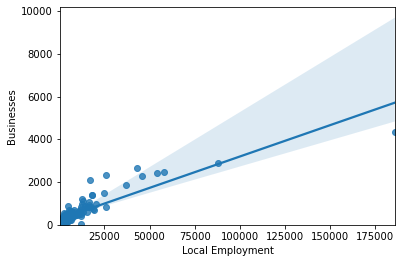

In [29]:
# Let`s visualize the correlation (Plotting the correlation)
sns.regplot(x='Local Employment', y= 'Businesses', data=df_merge3)
plt.ylim(0,)

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between both categories is statistically significant, and the linear relationship is quite strong (~0.88)</p> So, only the local employments jobs will be used in my further analysis. 

In [30]:
# Let`s calculate the Pearson Correlation Coefficient and P-value of 'Couples with children' and 'Child 0-4'. 
pearson_coef, p_value = stats.pearsonr(df_merge3[ '  Couples with children'], df_merge3['Child 0-14'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9096114519615661  with a P-value of P = 1.6933396161280994e-54


(0.0, 10787.553168658083)

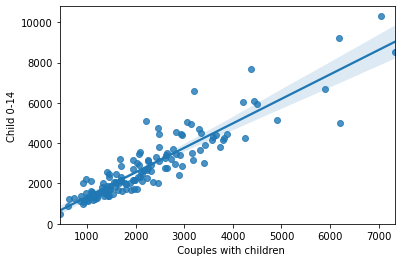

In [31]:
# Let`s visualize the correlation (Plotting the correlation)
sns.regplot(x='  Couples with children', y= 'Child 0-14', data=df_merge3)
plt.ylim(0,)

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between both categories is statistically significant, and the linear relationship is strong (~0.91), so only the first variable (couples with children will be used for further analysis (in order to reduce the volume of the data and to facilitate the analysis).<p>


In [32]:
# Let`s calculate the Pearson Correlation Coefficient and P-value of 'Couples with children' and 'Youth 15-24'. 
pearson_coef, p_value = stats.pearsonr(df_merge3[ '  Couples with children'], df_merge3['Youth 15-24'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8756675966827706  with a P-value of P = 1.8281427985670998e-45


(0.0, 7940.472779717462)

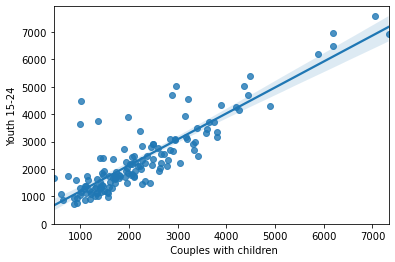

In [33]:
# Let`s visualize the correlation (Plotting the correlation)
sns.regplot(x='  Couples with children', y= 'Youth 15-24', data=df_merge3)
plt.ylim(0,)

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between both categories is statistically significant, and the linear relationship is quite strong (~0.88), so only the couples with children will be used for further analysis.<p>

In [34]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'Home Prices' and 'Debt Risk Score'. 
pearson_coef, p_value = stats.pearsonr(df_merge3['Home Prices'], df_merge3['Debt Risk Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6256998028579022  with a P-value of P = 1.3935401603796514e-16


(0.0, 861.3835847685799)

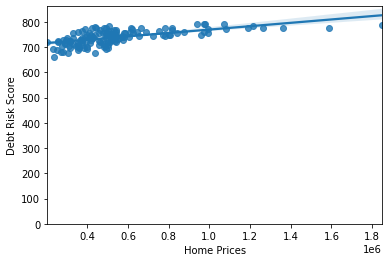

In [35]:
# Let`s visualize the correlation (Plotting the correlation)
sns.regplot(x='Home Prices', y= 'Debt Risk Score', data=df_merge3)
plt.ylim(0,)

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between both categories is statistically significant, and the linear relationship isn`t very strong (~0.63), but the relation between both categories that is interesting and can be used.</p>

In [36]:
# Let`s check the  Pearson Correlation Coefficient and P-value of Renters and Average household size
pearson_coef, p_value = stats.pearsonr(df_merge3['  Renter (Total - Private households by tenure - 25% sample data)'], df_merge3[' Average household size'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.5201209320563664  with a P-value of P = 4.5164218002695466e-11


(0.0, 3.5833911145422306)

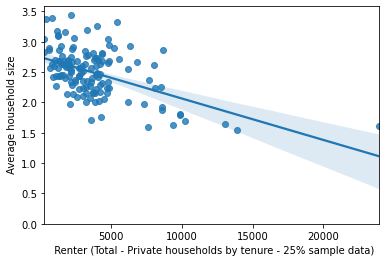

In [37]:
# Let`s visualize the correlation (Plotting the correlation)
sns.regplot(x='  Renter (Total - Private households by tenure - 25% sample data)', y=' Average household size', data=df_merge3)
plt.ylim(0,)

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between both categories is statistically significant, but the negative linear relationship isn`t very strong (~ -0.52).</p>

## Segmenting and clustering the neighborhoods in Toronto

###  Stage 1: Segmenting the neighborhoods from investors perspective 

The segmentation will help me divide the Toronto's neighborhoods into groups with similar characteristics. The key purpose in this stage (1) is to help the potential property investor in their strategy of targeting these specific groups of profitable neighborhoods. In order to segment the 140 neighborhoods, only the data related to  debt risk, local employment jobs, average income, house prices and breaks and enters will be used. The key question that has to be answered is "Which neighborhood/s is/are the best for residential property investment?". 

In [38]:
df_merge3.columns.values

array(['Neighbourhood', 'Businesses', 'Child Care Spaces',
       'Debt Risk Score', 'Home Prices', 'Local Employment',
       'Neighbourhood Id', ' Average household size',
       '  Couples with children',
       '  Average after-tax income of households in 2015 ($)',
       '  Renter (Total - Private households by tenure - 25% sample data)',
       'Child 0-14', 'Youth 15-24', 'Break & Enters', 'Green Spaces'],
      dtype=object)

In [39]:
df_segm= df_merge3.drop(columns=[ 'Child Care Spaces', ' Average household size','  Couples with children', 'Businesses', 'Child 0-14', 'Youth 15-24', 'Green Spaces','Neighbourhood Id'])
df_segm.head()

,Neighbourhood,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters
0,West Humber-Clairville,719,317508,58271,426156,3275,175
1,Mount Olive-Silverstone-Jamestown,687,251119,3244,360648,5455,61
2,Thistletown-Beaumond Heights,718,414216,1311,140050,1245,36
3,Rexdale-Kipling,721,392271,1178,134305,1685,32
4,Elms-Old Rexdale,692,233832,903,123119,1470,25


#### Descriptive Statistical Analysis - stage 1

In [40]:
# Let's check the basic statistics for all variables, as all of them are continuous 
df_segm.describe()

,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters
count,140.000000,1.400000e+02,140.0000,1.400000e+02,140.000000,140.00000
mean,739.157143,5.481934e+05,9409.3500,3.512761e+05,3755.678571,75.25000
std,28.626162,2.676674e+05,19125.3383,2.309379e+05,3008.979559,42.15595
min,661.000000,2.041040e+05,438.0000,1.022590e+05,280.000000,12.00000
25%,720.500000,3.749645e+05,2069.5000,1.953375e+05,1946.250000,44.75000
50%,741.000000,4.912100e+05,4052.5000,2.915495e+05,3232.500000,63.00000
75%,759.000000,5.902160e+05,10127.0000,4.305408e+05,4338.750000,99.00000
max,793.000000,1.849084e+06,185891.0000,1.413132e+06,23930.000000,219.00000


In [41]:
#Normalizing over the standard deviation. Using this statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. I use __StandardScaler()__ to normalize the dataset.
from sklearn.preprocessing import StandardScaler
X = df_segm.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-7.06679461e-01, -8.64930509e-01,  2.56398583e+00,
         3.25406670e-01, -1.60321638e-01,  2.37471034e+00],
       [-1.82855189e+00, -1.11384903e+00, -3.23523050e-01,
         4.07274935e-02,  5.66777908e-01, -3.39244335e-01],
       [-7.41737974e-01, -5.02334102e-01, -4.24956067e-01,
        -9.17928808e-01, -8.37391399e-01, -9.34409834e-01],
       [-6.36562434e-01, -5.84614556e-01, -4.31935163e-01,
        -9.42894948e-01, -6.90637363e-01, -1.02963631e+00],
       [-1.65325932e+00, -1.17866481e+00, -4.46365623e-01,
        -9.91506129e-01, -7.62346721e-01, -1.19628265e+00],
       [-7.76796487e-01, -9.57341825e-01, -3.46874158e-01,
        -3.40383126e-01, -6.89696326e-03, -3.86857575e-01],
       [ 3.80134451e-01, -1.37064378e-01, -3.97039686e-01,
         2.65201118e-01,  5.64740981e-02, -2.20211235e-01],
       [ 4.85309991e-01, -2.12955864e-01, -4.46732944e-01,
        -4.89419463e-01, -7.12316936e-01, -1.12486279e+00],
       [ 7.65778097e-01,  1.21883277e+00, -4.237

#### Finding the optimal K (number ot clusters) using the Elbow method 

Defining the following:

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.    
Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [42]:
from scipy.spatial.distance import cdist 

In [43]:
# Building the clustering model and calculating the values of the Distortion and Inertia

distortions = []
inertias = []

mapping1 = {} 
mapping2 = {}

K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Clus_dataSet)
    #distortions.append(kmeanModel.inertia_)
    
    
    distortions.append(sum(np.min(cdist(Clus_dataSet, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Clus_dataSet.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
    mapping1[k] = sum(np.min(cdist(Clus_dataSet, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Clus_dataSet.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [44]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 2.0706735066814854
2 : 1.8036643801082304
3 : 1.6560989549693126
4 : 1.441092310323552
5 : 1.3404247535036862
6 : 1.254164293687282
7 : 1.2164605379391422
8 : 1.1531235428298297
9 : 1.107362810522728
10 : 1.0695963648068225
11 : 1.0377042806543324
12 : 1.0075769066186748
13 : 0.9692710353863009
14 : 0.9552639505083168


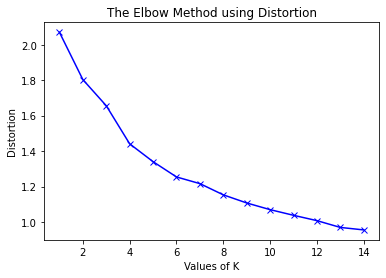

In [45]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [46]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 839.9999999999999
2 : 629.4633897934164
3 : 483.390294476755
4 : 389.7261355290913
5 : 303.3384701365075
6 : 267.7821947631969
7 : 249.46412050324005
8 : 224.5446799862555
9 : 206.75767353785898
10 : 191.17281047041828
11 : 180.66438593309007
12 : 167.71388937097703
13 : 153.9697001750653
14 : 147.6608682897649


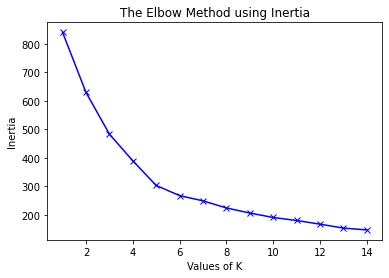

In [47]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

As we can see the best k according the model is 5. 

In [136]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 1 1 1 1 1 3 1 0 4 1 1 1 3 4 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1
 0 4 4 2 3 1 1 3 1 3 1 0 0 3 3 1 3 1 4 1 1 1 1 1 1 4 1 1 1 0 0 1 3 1 1 1 1
 3 3 3 1 0 0 0 3 1 1 1 3 3 3 0 1 1 1 3 0 4 4 4 2 0 0 2 0 2 3 4 0 1 1 1 1 1
 1 1 0 1 3 3 3 1 1 1 3 1 1 1 1 1 1 3 3 3 3 1 1 1 1 3 1 1 1]


In [137]:
df_segm["Clus_data"] = labels
df_segm

,Neighbourhood,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data
1,West Humber-Clairville,719,317508,58271,426156,3275,175,3
2,Mount Olive-Silverstone-Jamestown,687,251119,3244,360648,5455,61,1
3,Thistletown-Beaumond Heights,718,414216,1311,140050,1245,36,1
4,Rexdale-Kipling,721,392271,1178,134305,1685,32,1
5,Elms-Old Rexdale,692,233832,903,123119,1470,25,1
6,Kingsview Village-The Westway,717,292861,2799,272950,3735,59,1
7,Willowridge-Martingrove-Richview,750,511637,1843,412302,3925,66,3
8,Humber Heights-Westmount,753,491396,896,238655,1620,28,1
9,Edenbridge-Humber Valley,761,873268,1334,441052,2745,75,0
10,Princess-Rosethorn,791,971668,1226,538736,595,50,4


In [138]:
df_segm.index = np.arange(1,len(df_segm)+1)
df_segm.head()

,Neighbourhood,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data
1,West Humber-Clairville,719,317508,58271,426156,3275,175,3
2,Mount Olive-Silverstone-Jamestown,687,251119,3244,360648,5455,61,1
3,Thistletown-Beaumond Heights,718,414216,1311,140050,1245,36,1
4,Rexdale-Kipling,721,392271,1178,134305,1685,32,1
5,Elms-Old Rexdale,692,233832,903,123119,1470,25,1


In [139]:
df_segm.groupby('Clus_data').mean()

,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters
Clus_data,,,,,,
0,757.000000,7.843599e+05,4548.000000,2.859371e+05,2660.625000,54.812500
1,725.987179,4.227271e+05,5771.320513,2.191211e+05,3085.320513,61.910256
2,781.000000,1.478962e+06,8623.750000,1.201593e+06,2212.500000,74.750000
3,745.093750,4.676418e+05,21438.531250,5.014442e+05,6364.218750,113.250000
4,777.600000,1.034422e+06,7385.000000,6.659635e+05,3006.500000,90.600000


After grouping the data by clusters and calculating the mean, the neighborhoods that are good enough for investment can be determined. 

By descending home prices, the clusters are: 2,4,0,3,1. 
By ascending debt risk score the clusters’ order is: 1,3,0,4,2. We can figure out that the neighborhoods with smaller home prices (cluster 1), are same as the neighborhoods with smaller debt risk score and vice versa. 
By descending average households’ income, the order of the clusters is: 2,4,3,0,1. So in the neighborhoods from clusters 2,3,4 the average households’ income is more than the average (3.512761e+05). Also, interesting fact is that the neighborhoods where the income is the least (cluster 1), the home prices and the debt risk are the smallest. 
By descending number of renters, the clusters' order is: 3,1,4,0,2. Interesting result, is that the neighborhoods (cluster 2) with the highest prices, match the ones with the least number of renters. So, these neighborhoods are preferred form buyers of their own home (where to live). 
By descending local employment jobs, the clusters are in this line: 3,2,4,1,0.
By ascending number of breaks and enters the clusters are in this configuration: 0,1,2,4,3.


In [140]:
df_segm1=df_segm.rename_axis("Neighbourhood Id")
df_segm1.head()

,Neighbourhood,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data
Neighbourhood Id,,,,,,,,
1,West Humber-Clairville,719,317508,58271,426156,3275,175,3
2,Mount Olive-Silverstone-Jamestown,687,251119,3244,360648,5455,61,1
3,Thistletown-Beaumond Heights,718,414216,1311,140050,1245,36,1
4,Rexdale-Kipling,721,392271,1178,134305,1685,32,1
5,Elms-Old Rexdale,692,233832,903,123119,1470,25,1


In [141]:
clusters_merge= pd.merge(df_segm1, Latlong, on='Neighbourhood Id', how='inner')
clusters_merge.head()

,Neighbourhood Id,Neighbourhood_x,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data,Neighbourhood_y,LONGITUDE,LATITUDE
0,1,West Humber-Clairville,719,317508,58271,426156,3275,175,3,West Humber-Clairville (1),-79.596356,43.716180
1,2,Mount Olive-Silverstone-Jamestown,687,251119,3244,360648,5455,61,1,Mount Olive-Silverstone-Jamestown (2),-79.587259,43.746868
2,3,Thistletown-Beaumond Heights,718,414216,1311,140050,1245,36,1,Thistletown-Beaumond Heights (3),-79.563491,43.737988
3,4,Rexdale-Kipling,721,392271,1178,134305,1685,32,1,Rexdale-Kipling (4),-79.566228,43.723725
4,5,Elms-Old Rexdale,692,233832,903,123119,1470,25,1,Elms-Old Rexdale (5),-79.548983,43.721519


In [151]:
clusters_m =clusters_merge.drop (columns = ['Neighbourhood_y'])
clusters_m

,Neighbourhood Id,Neighbourhood_x,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data,LONGITUDE,LATITUDE
0,1,West Humber-Clairville,719,317508,58271,426156,3275,175,3,-79.596356,43.716180
1,2,Mount Olive-Silverstone-Jamestown,687,251119,3244,360648,5455,61,1,-79.587259,43.746868
2,3,Thistletown-Beaumond Heights,718,414216,1311,140050,1245,36,1,-79.563491,43.737988
3,4,Rexdale-Kipling,721,392271,1178,134305,1685,32,1,-79.566228,43.723725
4,5,Elms-Old Rexdale,692,233832,903,123119,1470,25,1,-79.548983,43.721519
5,6,Kingsview Village-The Westway,717,292861,2799,272950,3735,59,1,-79.547863,43.698993
6,7,Willowridge-Martingrove-Richview,750,511637,1843,412302,3925,66,3,-79.554221,43.683645
7,8,Humber Heights-Westmount,753,491396,896,238655,1620,28,1,-79.522416,43.692233
8,9,Edenbridge-Humber Valley,761,873268,1334,441052,2745,75,0,-79.522458,43.670886
9,10,Princess-Rosethorn,791,971668,1226,538736,595,50,4,-79.544559,43.666051


In [143]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clusters_m['LATITUDE'], clusters_m['LONGITUDE'], clusters_m['Neighbourhood_x'], clusters_m['Clus_data']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [144]:
# Let's range the clusters by number
df_cluster_range= clusters_m.sort_values(by='Clus_data', ascending=True)
df_cluster_range.head(15)

,Neighbourhood Id,Neighbourhood_x,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data,LONGITUDE,LATITUDE
49,50,Newtonbrook East,757,626626,4357,335768,2155,116,0,-79.405937,43.791536
113,114,Lambton Baby Point,749,806452,438,214945,1280,20,0,-79.496045,43.657420
88,89,Runnymede-Bloor West Village,777,666204,2421,223885,815,42,0,-79.485708,43.659269
80,81,Trinity-Bellwoods,742,723909,5380,333954,3305,67,0,-79.415342,43.650176
79,80,Palmerston-Little Italy,742,781568,3262,347339,3715,57,0,-79.418409,43.659157
78,79,University,748,773920,10967,197072,2125,53,0,-79.401180,43.662506
93,94,Wychwood,745,656868,5143,239484,3040,58,0,-79.425515,43.676919
8,9,Edenbridge-Humber Valley,761,873268,1334,441052,2745,75,0,-79.522458,43.670886
37,38,Lansing-Westgate,758,646460,12254,356122,2740,46,0,-79.424748,43.754271
67,68,North Riverdale,767,818592,4033,318764,2205,79,0,-79.351260,43.671995


In [145]:
df_cluster_range.reset_index(drop=True)

,Neighbourhood Id,Neighbourhood_x,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data,LONGITUDE,LATITUDE
0,50,Newtonbrook East,757,626626,4357,335768,2155,116,0,-79.405937,43.791536
1,114,Lambton Baby Point,749,806452,438,214945,1280,20,0,-79.496045,43.657420
2,89,Runnymede-Bloor West Village,777,666204,2421,223885,815,42,0,-79.485708,43.659269
3,81,Trinity-Bellwoods,742,723909,5380,333954,3305,67,0,-79.415342,43.650176
4,80,Palmerston-Little Italy,742,781568,3262,347339,3715,57,0,-79.418409,43.659157
5,79,University,748,773920,10967,197072,2125,53,0,-79.401180,43.662506
6,94,Wychwood,745,656868,5143,239484,3040,58,0,-79.425515,43.676919
7,9,Edenbridge-Humber Valley,761,873268,1334,441052,2745,75,0,-79.522458,43.670886
8,38,Lansing-Westgate,758,646460,12254,356122,2740,46,0,-79.424748,43.754271
9,68,North Riverdale,767,818592,4033,318764,2205,79,0,-79.351260,43.671995


In [147]:
# Let's drop the neighborhoods in cluster 1 (as not good enoug for inverstments)
clusters_final = df_cluster_range.drop(df_cluster_range.index[16:94], axis=0)
clusters_final

,Neighbourhood Id,Neighbourhood_x,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data,LONGITUDE,LATITUDE
49,50,Newtonbrook East,757,626626,4357,335768,2155,116,0,-79.405937,43.791536
113,114,Lambton Baby Point,749,806452,438,214945,1280,20,0,-79.496045,43.657420
88,89,Runnymede-Bloor West Village,777,666204,2421,223885,815,42,0,-79.485708,43.659269
80,81,Trinity-Bellwoods,742,723909,5380,333954,3305,67,0,-79.415342,43.650176
79,80,Palmerston-Little Italy,742,781568,3262,347339,3715,57,0,-79.418409,43.659157
78,79,University,748,773920,10967,197072,2125,53,0,-79.401180,43.662506
93,94,Wychwood,745,656868,5143,239484,3040,58,0,-79.425515,43.676919
8,9,Edenbridge-Humber Valley,761,873268,1334,441052,2745,75,0,-79.522458,43.670886
37,38,Lansing-Westgate,758,646460,12254,356122,2740,46,0,-79.424748,43.754271
67,68,North Riverdale,767,818592,4033,318764,2205,79,0,-79.351260,43.671995


In [149]:
# Let's visualize only the possible good for investmetns clusters (0,2,3,4)
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clusters_final['LATITUDE'], clusters_final['LONGITUDE'], clusters_final['Neighbourhood_x'], clusters_final['Clus_data']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Segmenting the neighborhoods from family perspective- stage 2

In [80]:
# Preparing the data 
df_family = df_merge3.drop(columns= ['Businesses',
       'Debt Risk Score', 'Home Prices', 'Local Employment',
       '  Average after-tax income of households in 2015 ($)',
       '  Renter (Total - Private households by tenure - 25% sample data)',
       'Child 0-14', 'Youth 15-24', 'Break & Enters',' Average household size'])
df_family.head()

,Neighbourhood,Child Care Spaces,Neighbourhood Id,Couples with children,Green Spaces
0,West Humber-Clairville,195,1,4490,2.078836
1,Mount Olive-Silverstone-Jamestown,60,2,4365,1.048870
2,Thistletown-Beaumond Heights,25,3,1310,0.939108
3,Rexdale-Kipling,75,4,1300,0.240663
4,Elms-Old Rexdale,60,5,1085,0.730090


In [74]:
#Let's check the basic statistics for all variables, as all of them are continuous 
df_family.describe()

,Child Care Spaces,Couples with children,Green Spaces
count,140.000000,140.000000,140.000000
mean,124.685714,2257.500000,0.581388
std,81.603541,1245.732066,1.288385
min,0.000000,450.000000,0.001837
25%,60.000000,1408.750000,0.124943
50%,109.500000,1977.500000,0.251777
75%,176.000000,2813.750000,0.687403
max,441.000000,7330.000000,14.271455


In [82]:
# merging with clusters 0,2,3,4
Clus_merge=pd.merge(df_family,clusters_final, on='Neighbourhood Id', how='inner')
Clus_merge

,Neighbourhood,Child Care Spaces,Neighbourhood Id,Couples with children,Green Spaces,Neighbourhood_x,Debt Risk Score,Home Prices,Local Employment,Average after-tax income of households in 2015 ($),Renter (Total - Private households by tenure - 25% sample data),Break & Enters,Clus_data,LONGITUDE,LATITUDE
0,West Humber-Clairville,195,1,4490,2.078836,West Humber-Clairville,719,317508,58271,426156,3275,175,3,-79.596356,43.716180
1,Willowridge-Martingrove-Richview,165,7,2905,0.348688,Willowridge-Martingrove-Richview,750,511637,1843,412302,3925,66,3,-79.554221,43.683645
2,Edenbridge-Humber Valley,30,9,1980,0.544804,Edenbridge-Humber Valley,761,873268,1334,441052,2745,75,0,-79.522458,43.670886
3,Princess-Rosethorn,367,10,1805,0.220795,Princess-Rosethorn,791,971668,1226,538736,595,50,4,-79.544559,43.666051
4,Islington-City Centre West,204,14,4900,0.510250,Islington-City Centre West,755,491678,45794,854623,8105,207,3,-79.543317,43.633463
5,Kingsway South,115,15,1370,0.295551,Kingsway South,793,941223,2335,900624,660,29,4,-79.510577,43.653520
6,Stonegate-Queensway,283,16,3420,0.755267,Stonegate-Queensway,760,690949,5932,516575,3665,86,3,-79.501128,43.635518
7,Mimico,195,17,2805,0.716898,Mimico,741,429941,11549,583422,8635,139,3,-79.500137,43.615924
8,Glenfield-Jane Heights,173,25,3200,0.808034,Glenfield-Jane Heights,678,304262,8323,410012,4810,84,3,-79.513465,43.745636
9,Downsview-Roding-CFB,238,26,4205,0.852076,Downsview-Roding-CFB,692,400486,20150,562794,6855,187,3,-79.490497,43.733292


In [85]:
Clus_merge.columns.values

array(['Neighbourhood', 'Child Care Spaces', 'Neighbourhood Id',
       '  Couples with children', 'Green Spaces', 'Neighbourhood_x',
       'Debt Risk Score', 'Home Prices', 'Local Employment',
       '  Average after-tax income of households in 2015 ($)',
       '  Renter (Total - Private households by tenure - 25% sample data)',
       'Break & Enters', 'Clus_data', 'LONGITUDE', 'LATITUDE'],
      dtype=object)

In [87]:
# Adding the latitude and the longitude
Family_df = Clus_merge.drop(columns= ['Neighbourhood Id', 'Neighbourhood_x',
       'Debt Risk Score', 'Home Prices', 'Local Employment',
       '  Average after-tax income of households in 2015 ($)',
       '  Renter (Total - Private households by tenure - 25% sample data)',
       'Break & Enters', 'Clus_data'])
Family_df.head()

,Neighbourhood,Child Care Spaces,Couples with children,Green Spaces,LONGITUDE,LATITUDE
0,West Humber-Clairville,195,4490,2.078836,-79.596356,43.716180
1,Willowridge-Martingrove-Richview,165,2905,0.348688,-79.554221,43.683645
2,Edenbridge-Humber Valley,30,1980,0.544804,-79.522458,43.670886
3,Princess-Rosethorn,367,1805,0.220795,-79.544559,43.666051
4,Islington-City Centre West,204,4900,0.510250,-79.543317,43.633463


In [91]:
Family = Family_df.drop(columns=['LONGITUDE', 'LATITUDE'])
Family.head()

,Neighbourhood,Child Care Spaces,Couples with children,Green Spaces
0,West Humber-Clairville,195,4490,2.078836
1,Willowridge-Martingrove-Richview,165,2905,0.348688
2,Edenbridge-Humber Valley,30,1980,0.544804
3,Princess-Rosethorn,367,1805,0.220795
4,Islington-City Centre West,204,4900,0.510250


In [92]:
#Normalizing over the standard deviation. Using this statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. I use __StandardScaler()__ to normalize the dataset.
from sklearn.preprocessing import StandardScaler
X1 = Family.values[:,1:]
X1 = np.nan_to_num(X1)
Clus_dataSet1 = StandardScaler().fit_transform(X1)
Clus_dataSet1

array([[ 0.44421537,  1.17532342,  0.71608396],
       [ 0.11223947,  0.13635458, -0.23657103],
       [-1.38165208, -0.4699837 , -0.12858553],
       [ 2.34754387, -0.58469635, -0.30699188],
       [ 0.54380814,  1.44407877, -0.14761177],
       [-0.4410537 , -0.86983922, -0.26582963],
       [ 1.41801135,  0.47393752, -0.01270031],
       [ 0.44421537,  0.0708045 , -0.03382701],
       [ 0.20076638,  0.32972733,  0.01635401],
       [ 0.9200475 ,  0.98850568,  0.0406045 ],
       [-0.88368823, -0.3946011 ,  0.11299822],
       [-1.04967618,  0.40510993, -0.37808331],
       [-0.34146093, -0.06357318, -0.13050054],
       [-1.71362798, -0.84034168,  0.52556114],
       [ 1.10816717,  0.41821994,  0.27586188],
       [ 3.16641776,  1.14582588,  0.04102221],
       [ 0.82045473,  0.72630534, -0.29677925],
       [ 0.27822742, -0.63713642,  0.07296666],
       [-1.38165208, -0.44048616, -0.32895818],
       [ 0.59913746,  2.29295237, -0.34132406],
       [-1.04967618, -0.15206579,  0.188

In [93]:
distortions1 = []
K1 = range(1,15)
for k in K1:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Clus_dataSet1)
    distortions1.append(kmeanModel.inertia_)

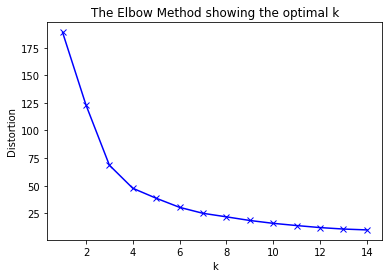

In [94]:
plt.plot(K1, distortions1, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X1)
labels = k_means.labels_
print(labels)

[3 0 0 2 3 2 3 0 3 3 0 3 0 2 3 3 3 2 0 1 0 0 0 0 2 2 0 2 2 0 2 2 2 2 2 0 0
 2 3 2 0 2 2 0 0 2 2 2 0 0 0 2 2 3 1 3 0 3 3 3 1 1 1]


In [99]:
Family["Clus_data"] = labels
Family.head()

,Neighbourhood,Child Care Spaces,Couples with children,Green Spaces,Clus_data
0,West Humber-Clairville,195,4490,2.078836,3
1,Willowridge-Martingrove-Richview,165,2905,0.348688,0
2,Edenbridge-Humber Valley,30,1980,0.544804,0
3,Princess-Rosethorn,367,1805,0.220795,2
4,Islington-City Centre West,204,4900,0.510250,3


In [100]:
Family.describe()

,Child Care Spaces,Couples with children,Green Spaces,Clus_data
count,63.000000,63.000000,63.000000,63.000000
mean,154.857143,2696.984127,0.778333,1.492063
std,91.093865,1537.804662,1.830720,1.189646
min,0.000000,450.000000,0.005830,0.000000
25%,81.500000,1530.000000,0.123605,0.000000
50%,162.000000,2325.000000,0.348688,2.000000
75%,213.000000,3410.000000,0.802522,2.000000
max,441.000000,7330.000000,14.271455,3.000000


In [101]:
Family.groupby('Clus_data').mean()

,Child Care Spaces,Couples with children,Green Spaces
Clus_data,,,
0,151.476190,2418.095238,0.764156
1,168.000000,6531.000000,3.414688
2,119.590909,1312.045455,0.257601
3,206.933333,3840.666667,0.683134


In [104]:
# Let's range the clusters by number
Family_cluster_range= Family.sort_values(by='Clus_data', ascending=True)
Family_cluster_range.head()

,Neighbourhood,Child Care Spaces,Couples with children,Green Spaces,Clus_data
44,Mount Pleasant East,82,2255,0.087790,0
29,Waterfront Communities-The Island,130,2890,2.567218,0
40,Annex,201,1975,0.112497,0
26,South Riverdale,224,2840,2.776069,0
43,Rosedale-Moore Park,162,2130,0.793671,0


In [105]:
Family_cluster_range.reset_index(drop=True)

,Neighbourhood,Child Care Spaces,Couples with children,Green Spaces,Clus_data
0,Mount Pleasant East,82,2255,0.087790,0
1,Waterfront Communities-The Island,130,2890,2.567218,0
2,Annex,201,1975,0.112497,0
3,South Riverdale,224,2840,2.776069,0
4,Rosedale-Moore Park,162,2130,0.793671,0
5,The Beaches,167,2780,0.614909,0
6,Leaside-Bennington,274,2635,0.797011,0
7,O'Connor-Parkview,75,2255,1.071735,0
8,Bayview Village,60,2465,1.121266,0
9,Newtonbrook East,30,2025,0.180901,0


In [116]:
# Let's drop the neighborhoods in cluster 2 (as not good enoug from family perspective)
Family_clust_final = Family_cluster_range.drop(Family_cluster_range.index[26:48], axis=0)
Family_clust_final
Family_clust_final.reset_index(drop=True)

,Neighbourhood,Child Care Spaces,Couples with children,Green Spaces,Clus_data
0,Mount Pleasant East,82,2255,0.087790,0
1,Waterfront Communities-The Island,130,2890,2.567218,0
2,Annex,201,1975,0.112497,0
3,South Riverdale,224,2840,2.776069,0
4,Rosedale-Moore Park,162,2130,0.793671,0
5,The Beaches,167,2780,0.614909,0
6,Leaside-Bennington,274,2635,0.797011,0
7,O'Connor-Parkview,75,2255,1.071735,0
8,Bayview Village,60,2465,1.121266,0
9,Newtonbrook East,30,2025,0.180901,0


In [117]:
# adding Latitude and longuitude
Clus_Family=pd.merge(Family_df,Family_clust_final, on='Neighbourhood', how='inner')
Clus_Family

,Neighbourhood,Child Care Spaces_x,Couples with children_x,Green Spaces_x,LONGITUDE,LATITUDE,Child Care Spaces_y,Couples with children_y,Green Spaces_y,Clus_data
0,West Humber-Clairville,195,4490,2.078836,-79.596356,43.716180,195,4490,2.078836,3
1,Willowridge-Martingrove-Richview,165,2905,0.348688,-79.554221,43.683645,165,2905,0.348688,0
2,Edenbridge-Humber Valley,30,1980,0.544804,-79.522458,43.670886,30,1980,0.544804,0
3,Islington-City Centre West,204,4900,0.510250,-79.543317,43.633463,204,4900,0.510250,3
4,Stonegate-Queensway,283,3420,0.755267,-79.501128,43.635518,283,3420,0.755267,3
5,Mimico,195,2805,0.716898,-79.500137,43.615924,195,2805,0.716898,0
6,Glenfield-Jane Heights,173,3200,0.808034,-79.513465,43.745636,173,3200,0.808034,3
7,Downsview-Roding-CFB,238,4205,0.852076,-79.490497,43.733292,238,4205,0.852076,3
8,Lansing-Westgate,75,2095,0.983552,-79.424748,43.754271,75,2095,0.983552,0
9,Bedford Park-Nortown,60,3315,0.091683,-79.420227,43.731486,60,3315,0.091683,3


In [110]:
Clus_Family.columns.values

array(['Neighbourhood', 'Child Care Spaces_x',
       '  Couples with children_x', 'Green Spaces_x', 'LONGITUDE',
       'LATITUDE', 'Child Care Spaces_y', '  Couples with children_y',
       'Green Spaces_y', 'Clus_data'], dtype=object)

In [118]:
Clus_Family_final=Clus_Family.drop(columns=['Child Care Spaces_y', '  Couples with children_y',
       'Green Spaces_y'])
Clus_Family_final.head()

,Neighbourhood,Child Care Spaces_x,Couples with children_x,Green Spaces_x,LONGITUDE,LATITUDE,Clus_data
0,West Humber-Clairville,195,4490,2.078836,-79.596356,43.716180,3
1,Willowridge-Martingrove-Richview,165,2905,0.348688,-79.554221,43.683645,0
2,Edenbridge-Humber Valley,30,1980,0.544804,-79.522458,43.670886,0
3,Islington-City Centre West,204,4900,0.510250,-79.543317,43.633463,3
4,Stonegate-Queensway,283,3420,0.755267,-79.501128,43.635518,3


In [120]:
# Let's visualize clusters (0,2,3,)
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Clus_Family_final['LATITUDE'], Clus_Family_final['LONGITUDE'], Clus_Family_final['Neighbourhood'], Clus_Family_final['Clus_data']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Exploring the neighborhoods using Foursquare - stage 3

Defining Foursquare Credentials and Version

In [150]:
CLIENT_ID = '*****' # y31GBCFS3Y421BJBDKSA52QMGZYL15XYF4TCGTO25V2GHSSKTour Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: *****
CLIENT_SECRET:*****


#### Exploring  the area near L'Amoreaux

In [125]:
neighborhood_latitude = Clus_Family_final.loc[32, 'LATITUDE'] # neighborhood latitude value
neighborhood_longitude = Clus_Family_final.loc[32, 'LONGITUDE'] # neighborhood longitude value

neighborhood_name = Clus_Family_final.loc[32, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of L'Amoreaux are 43.7957160278, -79.3140842409.


In [126]:
# Getting the top 100 venues that are near L`Amoreaux within a radius of 500 meters.

LIMIT= 100
radius= 500

url= url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
    
url

'https://api.foursquare.com/v2/venues/explore?&client_id=31GBCFS3Y421BJBDKSA52QMGZYL15XYF4TCGTO25V2GHSSKT&client_secret=B4DUVBXCPR3MX4QP3XCF43GEAEBKXCV4BXCYPRL5V1WAAC1E&v=20180605&ll=43.7957160278,-79.3140842409&radius=500&limit=100'

In [127]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eef04a9216785001bf5c084'},
 'response': {'headerLocation': "L'Amoreaux",
  'headerFullLocation': "L'Amoreaux, Toronto",
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 18,
  'suggestedBounds': {'ne': {'lat': 43.8002160323, 'lng': -79.30786156433268},
   'sw': {'lat': 43.791216023299995, 'lng': -79.32030691746732}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6e2799f964a52052ae2ce3',
       'name': 'Happy Lamb Hot Pot',
       'location': {'address': '2543 Warden Ave.',
        'crossStreet': 'at Huntingwood Dr.',
        'lat': 43.79161068939604,
        'lng': -79.31326863757754,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.79161068939604,
          'lng': -79.31326863757754}],
        '

In [128]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [140]:
# Cleaning the json and structure it into a *pandas* dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize (venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Happy Lamb Hot Pot,Hotpot Restaurant,43.791611,-79.313269
1,Mr Congee Chinese Cuisine 龍粥記,Chinese Restaurant,43.798879,-79.318335
2,RBC Royal Bank,Bank,43.798236,-79.317952
3,Subway,Sandwich Place,43.798671,-79.318475
4,Phoenix Restaurant 金鳳餐廳,Chinese Restaurant,43.798198,-79.318432
5,TD Canada Trust,Bank,43.791904,-79.312910
6,Eggsmart,Breakfast Spot,43.796375,-79.318681
7,Domino's Pizza,Pizza Place,43.793565,-79.315464
8,Pizza Pizza,Pizza Place,43.797909,-79.318113
9,Red Sail Boat Bakery 紅帆船西餅麵包,Bakery,43.791656,-79.313317


In [134]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

18 venues were returned by Foursquare.


In [141]:
# Creating a function to repeat the same process

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [142]:
Neigh_venues = getNearbyVenues(names=Clus_Family_final['Neighbourhood'],
                                   latitudes=Clus_Family_final['LATITUDE'],
                                   longitudes=Clus_Family_final['LONGITUDE']
                                  )


West Humber-Clairville
Willowridge-Martingrove-Richview
Edenbridge-Humber Valley
Islington-City Centre West
Stonegate-Queensway
Mimico
Glenfield-Jane Heights
Downsview-Roding-CFB
Lansing-Westgate
Bedford Park-Nortown
St.Andrew-Windfields
Banbury-Don Mills
Parkwoods-Donalda
Don Valley Village
Newtonbrook East
Willowdale East
Bayview Village
O'Connor-Parkview
Leaside-Bennington
The Beaches
South Riverdale
Waterfront Communities-The Island
High Park-Swansea
High Park North
Dovercourt-Wallace Emerson-Juncti
Annex
Rosedale-Moore Park
Mount Pleasant East
Lawrence Park South
Mount Pleasant West
Lawrence Park North
Steeles
L'Amoreaux
Tam O'Shanter-Sullivan
Birchcliffe-Cliffside
Bendale
Agincourt North
Milliken
Rouge
Malvern
Woburn


In [143]:
print(Neigh_venues.shape)
Neigh_venues.head()

(540, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Humber-Clairville,43.71618,-79.596356,Tim Hortons,43.714657,-79.593716,Coffee Shop
1,West Humber-Clairville,43.71618,-79.596356,Mandarin Buffet,43.720360,-79.594387,Chinese Restaurant
2,West Humber-Clairville,43.71618,-79.596356,Staples Rexdale,43.718539,-79.594570,Paper / Office Supplies Store
3,West Humber-Clairville,43.71618,-79.596356,Xawaash,43.715786,-79.593053,Mediterranean Restaurant
4,West Humber-Clairville,43.71618,-79.596356,Winners,43.719819,-79.594923,Department Store


In [144]:
Neigh_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,17,17,17,17,17,17
Annex,24,24,24,24,24,24
Banbury-Don Mills,21,21,21,21,21,21
Bayview Village,3,3,3,3,3,3
Bedford Park-Nortown,25,25,25,25,25,25
Bendale,4,4,4,4,4,4
Birchcliffe-Cliffside,4,4,4,4,4,4
Don Valley Village,9,9,9,9,9,9
Dovercourt-Wallace Emerson-Juncti,12,12,12,12,12,12


In [145]:
#finding the unique categories

print('There are {} uniques categories.'.format(len(Neigh_venues['Venue Category'].unique())))

There are 149 uniques categories.


#### Analyzing each Neighborhood 

In [146]:
# one hot encoding
Neigh_onehot = pd.get_dummies(Neigh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Neigh_onehot['Neighborhood'] = Neigh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Neigh_onehot.columns[-1]] + list(Neigh_onehot.columns[:-1])
Neigh_onehot = Neigh_onehot[fixed_columns]

Neigh_onehot.head()

,Neighborhood,American Restaurant,Amphitheater,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Store,Bike Shop,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Line,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Stadium,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Home Service,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Lingerie Store,Liquor Store,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Nail Salon,New American Restaurant,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Restaurant,Rock Climbing Spot,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Social Club,South Indian Restaurant,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Toy / Game Store,Trail,Tram Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,West Humber-Clairville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,West Humber-Clairville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,West Humber-Clairville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,West Humber-Clairville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,West Humber-Clairville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
Neigh_onehot.shape

(540, 150)

In [153]:
Neigh_onehot.columns.values

array(['Neighborhood', 'American Restaurant', 'Amphitheater',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank', 'Bar',
       'Baseball Field', 'Beach', 'Beer Store', 'Bike Shop',
       'Boat or Ferry', 'Bookstore', 'Breakfast Spot', 'Brewery',
       'Bridal Shop', 'Bubble Tea Shop', 'Burger Joint', 'Bus Line',
       'Bus Stop', 'Business Service', 'Café', 'Camera Store',
       'Candy Store', 'Cantonese Restaurant', 'Caribbean Restaurant',
       'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store',
       'Coffee Shop', 'College Stadium', 'Comfort Food Restaurant',
       'Construction & Landscaping', 'Convenience Store',
       'Cosmetics Shop', 'Costume Shop', 'Deli / Bodega',
       'Department Store', 'Dessert Shop', 'Diner', 'Discount Store',
       'Dog Run', 'Donut Shop', 'Electronics Store',
       'Fast Food Restaurant', 'Fish & Chips Shop', 'Flower Shop', 'Food',
       'Food & Drink Shop', 'Fo

In [154]:
# Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Neigh_grouped = Neigh_onehot.groupby('Neighborhood').mean().reset_index()
Neigh_grouped.head()

,Neighborhood,American Restaurant,Amphitheater,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Store,Bike Shop,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Line,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Stadium,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Home Service,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Lingerie Store,Liquor Store,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Nail Salon,New American Restaurant,Noodle House,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Restaurant,Rock Climbing Spot,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Social Club,South Indian Restaurant,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Toy / Game Store,Trail,Tram Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Agincourt North,0.00,0.0,0.0,0.000000,0.0,0.000000,0.00,0.058824,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.117647,0.000000,0.058824,0.000000,0.0,0.00,0.000000,0.058824,0.00,0.0,0.0,0.0,0.000000,0.0,0.058824,0.000000,0.000000,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.058824,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.000000,0.058824,0.058824,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.00,0.058824,0.0,0.0,0.0,0.0,0.0
1,Annex,0.00,0.0,0.0,0.041667,0.0,0.041667,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.041667,0.0,0.0,0.0,0.083333,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.083333,0.0,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.041667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.041667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.041667,0.0,0.000000,0.0,0.0,0.0,0.041667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.041667,0.041667,0.041667,0.0,0.0,0.083333,0.0,0.0,0.0,0.041667,0.0,0.0,0.083333,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.0,0.041667,0.00,0.000000,0.0,0.0,0.0,0.0,0.0
2,Banbury-Don Mills,0.00,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.047619,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.00000

In [155]:
Neigh_grouped.shape

(40, 150)

In [156]:
# I`m interedtes only in bars, garden, garden center and playground, so I`ll drop the rest of the data 
Neigh_clust= Neigh_grouped.drop (columns=['American Restaurant', 'Amphitheater',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank',
       'Baseball Field', 'Beer Store', 'Bike Shop',
       'Boat or Ferry', 'Bookstore', 'Breakfast Spot', 'Brewery',
       'Bridal Shop', 'Bubble Tea Shop', 'Burger Joint', 'Bus Line',
       'Bus Stop', 'Business Service', 'Café', 'Camera Store',
       'Candy Store', 'Cantonese Restaurant', 'Caribbean Restaurant',
       'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store',
       'Coffee Shop', 'College Stadium', 'Comfort Food Restaurant',
       'Construction & Landscaping', 'Convenience Store',
       'Cosmetics Shop', 'Costume Shop', 'Deli / Bodega',
       'Department Store', 'Dessert Shop', 'Diner', 'Discount Store',
       'Dog Run', 'Donut Shop', 'Electronics Store',
       'Fast Food Restaurant', 'Fish & Chips Shop', 'Flower Shop', 'Food',
       'Food & Drink Shop', 'Food Truck', 'French Restaurant',
       'Fried Chicken Joint', 'Frozen Yogurt Shop',
       'Furniture / Home Store', 'Gaming Cafe',
       'Gas Station', 'Gastropub', 'General Entertainment', 'Gift Shop',
       'Gourmet Shop', 'Government Building', 'Greek Restaurant',
       'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Gym Pool',
       'Hobby Shop', 'Home Service', 'Hotel', 'Hotpot Restaurant',
       'IT Services', 'Ice Cream Shop', 'Indian Restaurant',
       'Indonesian Restaurant', 'Intersection', 'Italian Restaurant',
       'Japanese Restaurant', 'Juice Bar', 'Kids Store',
       'Korean Restaurant', 'Lake', 'Lingerie Store', 'Liquor Store',
       'Martial Arts Dojo', 'Medical Center', 'Mediterranean Restaurant',
       'Metro Station', 'Mexican Restaurant', 'Middle Eastern Restaurant',
       'Mobile Phone Shop', 'Movie Theater', 'Moving Target',
       'Nail Salon', 'New American Restaurant', 'Noodle House',
       'Other Great Outdoors', 'Paper / Office Supplies Store', 'Park',
       'Performing Arts Venue', 'Pet Store', 'Pharmacy', 'Pizza Place', 'Pool', 'Ramen Restaurant',
       'Recreation Center', 'Rental Car Location', 'Restaurant',
       'Rock Climbing Spot', 'Salad Place', 'Sandwich Place',
       'Scenic Lookout', 'Seafood Restaurant', 'Shoe Store',
       'Shopping Mall', 'Skating Rink', 'Social Club',
       'South Indian Restaurant', 'Spa', 'Sporting Goods Shop',
       'Steakhouse', 'Supermarket', 'Sushi Restaurant',
       'Swiss Restaurant', 'Syrian Restaurant', 'Taco Place', 'Tea Room',
       'Tennis Court', 'Thai Restaurant', 'Theme Park Ride / Attraction',
       'Toy / Game Store', 'Trail', 'Tram Station', 'Tree',
       'Turkish Restaurant', 'Vegetarian / Vegan Restaurant',
       'Video Store', 'Vietnamese Restaurant', 'Wine Shop',
       "Women's Store", 'Yoga Studio', 'Zoo', 'Zoo Exhibit'])
Neigh_clust

,Neighborhood,Bar,Beach,Garden,Garden Center,Playground,Pub
0,Agincourt North,0.000000,0.000000,0.000000,0.00,0.00,0.000000
1,Annex,0.000000,0.000000,0.000000,0.00,0.00,0.083333
2,Banbury-Don Mills,0.000000,0.000000,0.000000,0.00,0.00,0.000000
3,Bayview Village,0.000000,0.000000,0.000000,0.00,0.00,0.000000
4,Bedford Park-Nortown,0.000000,0.000000,0.000000,0.00,0.00,0.040000
5,Bendale,0.000000,0.000000,0.000000,0.00,0.00,0.000000
6,Birchcliffe-Cliffside,0.000000,0.000000,0.000000,0.00,0.00,0.000000
7,Don Valley Village,0.000000,0.000000,0.000000,0.00,0.00,0.000000
8,Dovercourt-Wallace Emerson-Juncti,0.083333,0.000000,0.000000,0.00,0.00,0.000000
9,Downsview-Roding-CFB,0.000000,0.000000,0.000000,0.00,0.00,0.000000


In [193]:
# Let`s exclude the neighborhoods with Bars and Pubs form out list

Neigh_Final = Neigh_clust.drop([1,4,17,24,34,8,22], axis=0)
Neigh_Final
Neigh_Final.reset_index(drop=True)

,Neighborhood,Bar,Beach,Garden,Garden Center,Playground,Pub
0,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0
1,Banbury-Don Mills,0.0,0.0,0.000000,0.00,0.00,0.0
2,Bayview Village,0.0,0.0,0.000000,0.00,0.00,0.0
3,Bendale,0.0,0.0,0.000000,0.00,0.00,0.0
4,Birchcliffe-Cliffside,0.0,0.0,0.000000,0.00,0.00,0.0
5,Don Valley Village,0.0,0.0,0.000000,0.00,0.00,0.0
6,Downsview-Roding-CFB,0.0,0.0,0.000000,0.00,0.00,0.0
7,Edenbridge-Humber Valley,0.0,0.0,0.000000,0.00,0.00,0.0
8,Glenfield-Jane Heights,0.0,0.0,0.000000,0.00,0.00,0.0
9,High Park North,0.0,0.0,0.000000,0.00,0.00,0.0


In [194]:
Neigh_Final.dtypes

Neighborhood      object
Bar              float64
Beach            float64
Garden           float64
Garden Center    float64
Playground       float64
Pub              float64
dtype: object

In [195]:
num_top_venues = 3

for hood in Neigh_Final['Neighborhood']:
    print("----"+hood+"----")
    temp = Neigh_Final[Neigh_Final['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt North----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Banbury-Don Mills----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Bayview Village----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Bendale----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Birchcliffe-Cliffside----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Don Valley Village----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Downsview-Roding-CFB----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Edenbridge-Humber Valley----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----Glenfield-Jane Heights----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----High Park North----
    venue  freq
0     Bar   0.0
1   Beach   0.0
2  Garden   0.0


----High Park-Swansea----
    venue  freq
0  Garden  0.08
1     Bar  0.00
2 

In [196]:
# Sorting the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [198]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Neigh_Final['Neighborhood']

for ind in np.arange(Neigh_Final.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Neigh_Final.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agincourt North,Pub,Playground,Garden Center
2,Banbury-Don Mills,Pub,Playground,Garden Center
3,Bayview Village,Pub,Playground,Garden Center
5,Bendale,Pub,Playground,Garden Center
6,Birchcliffe-Cliffside,Pub,Playground,Garden Center
7,Don Valley Village,Pub,Playground,Garden Center
9,Downsview-Roding-CFB,Pub,Playground,Garden Center
10,Edenbridge-Humber Valley,Pub,Playground,Garden Center
11,Glenfield-Jane Heights,Pub,Playground,Garden Center
12,High Park North,Pub,Playground,Garden Center


In [199]:
neighborhoods_venues_sorted.reset_index(drop=True)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agincourt North,Pub,Playground,Garden Center
1,Banbury-Don Mills,Pub,Playground,Garden Center
2,Bayview Village,Pub,Playground,Garden Center
3,Bendale,Pub,Playground,Garden Center
4,Birchcliffe-Cliffside,Pub,Playground,Garden Center
5,Don Valley Village,Pub,Playground,Garden Center
6,Downsview-Roding-CFB,Pub,Playground,Garden Center
7,Edenbridge-Humber Valley,Pub,Playground,Garden Center
8,Glenfield-Jane Heights,Pub,Playground,Garden Center
9,High Park North,Pub,Playground,Garden Center


## Final Clustering

In [201]:
from sklearn.preprocessing import StandardScaler
X2 = Neigh_Final.values[:,1:]
X2 = np.nan_to_num(X2)
Clus_dataSet2 = StandardScaler().fit_transform(X2)
Clus_dataSet2

array([[ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        , -0.1767767 , -0.1767767 , -0.1767767 ,
         0.        ],
       [ 0.        ,  0.        ,  5.65685425, -0.

In [206]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X2)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0]


In [207]:
Neigh_Final["Clus_data"] = labels
Neigh_Final

,Neighborhood,Bar,Beach,Garden,Garden Center,Playground,Pub,Clus_data
0,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0
2,Banbury-Don Mills,0.0,0.0,0.000000,0.00,0.00,0.0,0
3,Bayview Village,0.0,0.0,0.000000,0.00,0.00,0.0,0
5,Bendale,0.0,0.0,0.000000,0.00,0.00,0.0,0
6,Birchcliffe-Cliffside,0.0,0.0,0.000000,0.00,0.00,0.0,0
7,Don Valley Village,0.0,0.0,0.000000,0.00,0.00,0.0,0
9,Downsview-Roding-CFB,0.0,0.0,0.000000,0.00,0.00,0.0,0
10,Edenbridge-Humber Valley,0.0,0.0,0.000000,0.00,0.00,0.0,0
11,Glenfield-Jane Heights,0.0,0.0,0.000000,0.00,0.00,0.0,0
12,High Park North,0.0,0.0,0.000000,0.00,0.00,0.0,0


In [218]:
# adding Latitude and longuitude
Neigh_Final_map= pd.merge(Neigh_Final,Neigh_venues,on='Neighborhood', how='inner')
Neigh_Final_map

,Neighborhood,Bar,Beach,Garden,Garden Center,Playground,Pub,Clus_data,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
1,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy
2,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant
3,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Dollarama,43.808894,-79.269854,Discount Store
4,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Popeyes Louisiana Kitchen,43.808652,-79.267929,Fried Chicken Joint
5,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Pizza Pizza,43.808318,-79.268537,Pizza Place
6,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Subway,43.809372,-79.269474,Sandwich Place
7,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,RBC Royal Bank,43.808757,-79.269280,Bank
8,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,The Beer Store,43.809286,-79.263676,Beer Store
9,Agincourt North,0.0,0.0,0.000000,0.00,0.00,0.0,0,43.805441,-79.266712,Iroquois Park,43.803666,-79.267989,Park


In [221]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Neigh_Final_map['Neighborhood Latitude'], Neigh_Final_map['Neighborhood Longitude'], Neigh_Final_map['Neighborhood'], Neigh_Final_map['Clus_data']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters